# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Importing Data

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not.

In [3]:
#checking shape of Data.
df.shape

(1000, 40)

In [4]:
# Checking Data Types of all Features.
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [5]:
#Getting details from data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
pd.concat({'unique values': df.apply(pd.unique), 'number of unique values': df.nunique()}, axis=1)

,unique values,number of unique values
months_as_customer,"[328, 228, 134, 256, 137, 165, 27, 212, 235, 4...",391
age,"[48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...",46
policy_number,"[521585, 342868, 687698, 227811, 367455, 10459...",1000
policy_bind_date,"[17-10-2014, 27-06-2006, 06-09-2000, 25-05-199...",951
policy_state,"[OH, IN, IL]",3
policy_csl,"[250/500, 100/300, 500/1000]",3
policy_deductable,"[1000, 2000, 500]",3
policy_annual_premium,"[1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...",991
umbrella_limit,"[0, 5000000, 6000000, 4000000, 3000000, 800000...",11
insured_zip,"[466132, 468176, 430632, 608117, 610706, 47845...",995


Here, We are checking unique values of all features in Data and How many columns are categorical.

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

No missing values are present in data.

<AxesSubplot:>

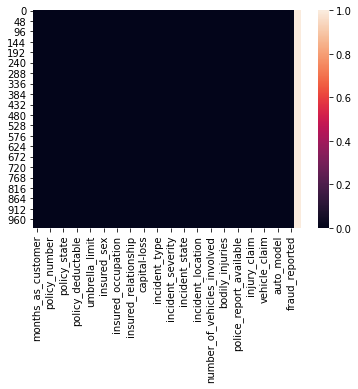

In [8]:
sns.heatmap(df.isnull())

Checking Missing value with the help of Heatmap.

In [9]:
df.drop(['_c39'],axis=1,inplace=True)

droping "_c39" columns as we are getting it contents with NaN values.

# Statistical Summary

In [10]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000


Here we are analysing the all numerical features statistically and as we are seeing here all numerical features describing with count,mean,std,minm,25%,50%, 75% and max.

In [11]:
#Checking Target Variable unique values for encoding.
df['fraud_reported'].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

In [12]:
#Replacing Target Variable value with "N"=0, "Y"=1.
df.replace({"N": 0, "Y": 1}, inplace = True)

In [13]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

Final output of target variable after replacement.

# Data Visualization

# Univariate Analysis

Text(0.5, 1.0, 'age')

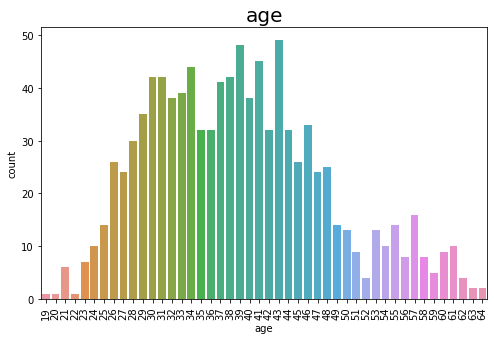

In [14]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="age")
plt.xticks(rotation=90)
plt.title("age", fontsize = 20)

As we are getting highest age counted between 28 to 43.

Text(0.5, 1.0, 'policy_state')

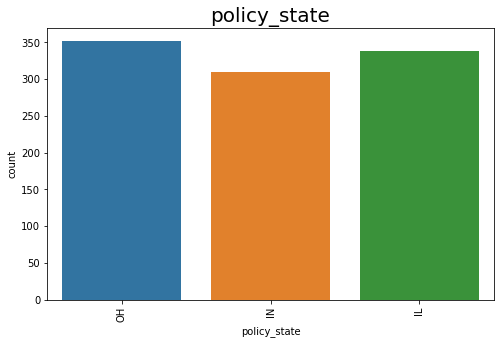

In [15]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="policy_state")
plt.xticks(rotation=90)
plt.title("policy_state", fontsize = 20)

In plicy_state the OH and IL is high according to IN.

Text(0.5, 1.0, 'insured_sex')

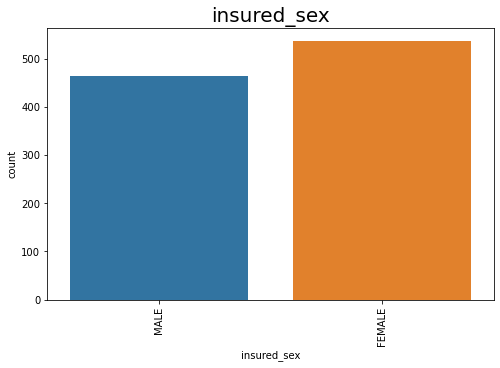

In [16]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="insured_sex")
plt.xticks(rotation=90)
plt.title("insured_sex", fontsize = 20)

According to data Female is highly insured then Male.

Text(0.5, 1.0, 'insured_education_level')

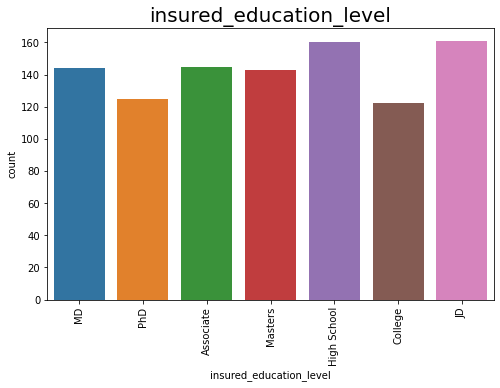

In [17]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="insured_education_level")
plt.xticks(rotation=90)
plt.title("insured_education_level", fontsize = 20)

High School and JD is higher then others.

Text(0.5, 1.0, 'insured_occupation')

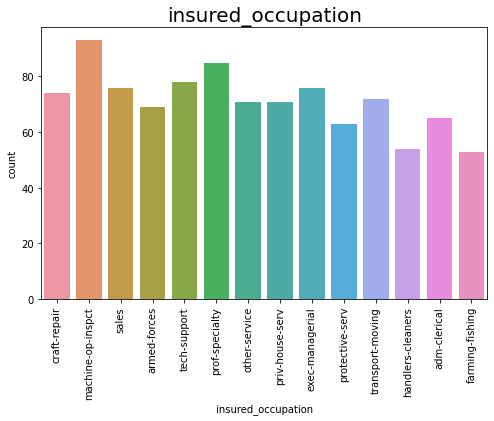

In [18]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="insured_occupation")
plt.xticks(rotation=90)
plt.title("insured_occupation", fontsize = 20)

Machine-Op-Inspct and Prof-specialty is higher then others.

Text(0.5, 1.0, 'insured_relationship')

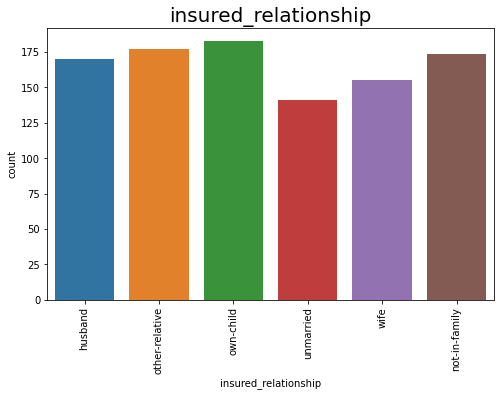

In [19]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="insured_relationship")
plt.xticks(rotation=90)
plt.title("insured_relationship", fontsize = 20)

Own-child is higher then others.

Text(0.5, 1.0, 'incident_type')

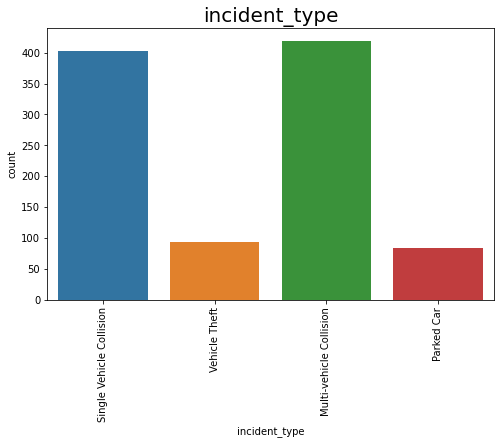

In [20]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="incident_type")
plt.xticks(rotation=90)
plt.title("incident_type", fontsize = 20)

Highest Case are Multi-vehicle collision and Singh Vehicle collision and other are few.

In [21]:
df['collision_type'].unique()

array(['Side Collision', '?', 'Rear Collision', 'Front Collision'],
      dtype=object)

In [22]:
df['collision_type'] = df['collision_type'].replace(['?'],np.nan)

In [23]:
df = df.fillna(df['collision_type'].value_counts().index[0])

Replacing ? value from Collision_type column and converting as NaN and treating as NaN. 

Text(0.5, 1.0, 'collision_type')

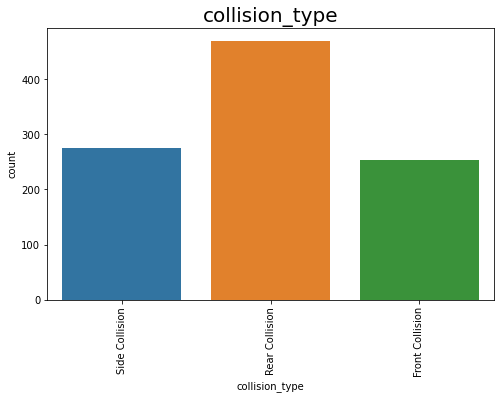

In [24]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="collision_type")
plt.xticks(rotation=90)
plt.title("collision_type", fontsize = 20)

the maximum case are Rear Collision.

Text(0.5, 1.0, 'incident_severity')

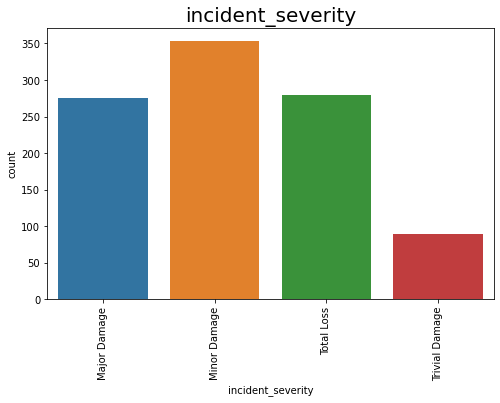

In [25]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="incident_severity")
plt.xticks(rotation=90)
plt.title("incident_severity", fontsize = 20)

Highest case are Minor Damage and Second or third highest are Major and Total Loss.

Text(0.5, 1.0, 'authorities_contacted')

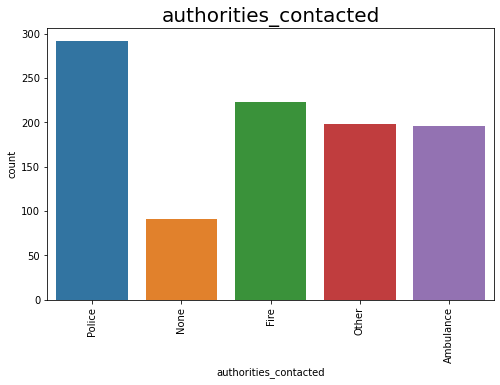

In [26]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="authorities_contacted")
plt.xticks(rotation=90)
plt.title("authorities_contacted", fontsize = 20)

In Maximum case police authorities contacted.

Text(0.5, 1.0, 'incident_state')

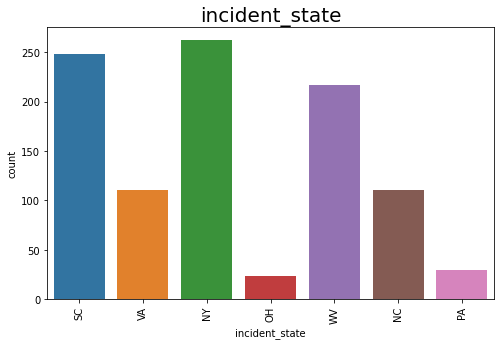

In [27]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="incident_state")
plt.xticks(rotation=90)
plt.title("incident_state", fontsize = 20)

Highest NY and SC, WV are second highest. 

Text(0.5, 1.0, 'fraud_reported')

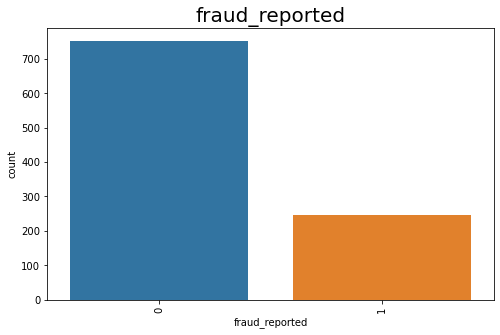

In [28]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="fraud_reported")
plt.xticks(rotation=90)
plt.title("fraud_reported", fontsize = 20)

According to data maximum are not Fraud_reported.

# Bivariate Aanalysis

<AxesSubplot:xlabel='fraud_reported', ylabel='months_as_customer'>

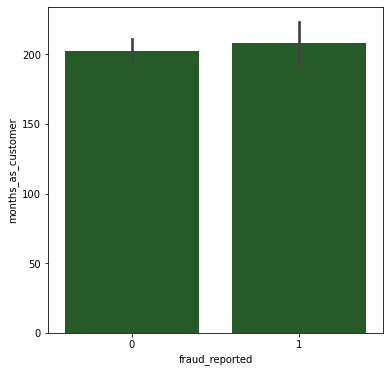

In [29]:
plt.figure(figsize = (6,6))
sns.barplot( x = 'fraud_reported' , y ='months_as_customer', data = df , dodge = True ,color = 'Green' , saturation = 0.4)

In here we are not able to find much relation in between this feature and our target variable .

<AxesSubplot:xlabel='age', ylabel='count'>

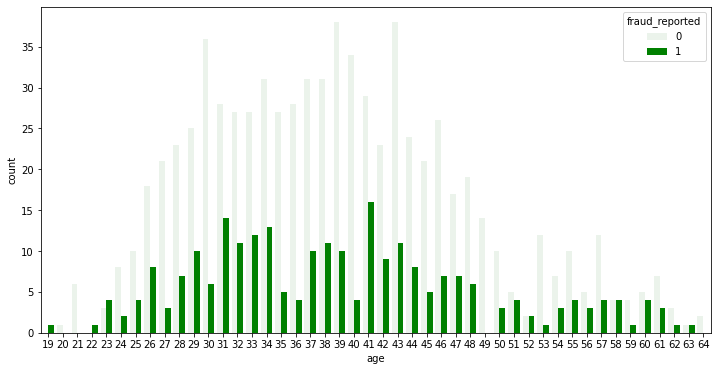

In [30]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'age' , hue = 'fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

Maximum Fraud_reported age between 41 and second highest are 30 to 40.

<AxesSubplot:xlabel='policy_state', ylabel='count'>

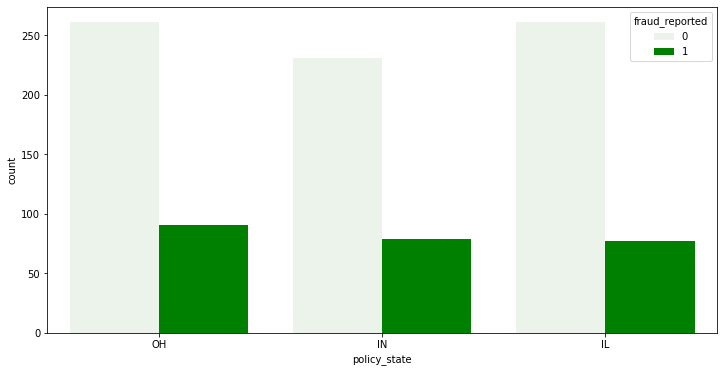

In [31]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'policy_state' , hue = 'fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

From above we can observe that OH has max fraud reported and IN is a state with less case reported .

<AxesSubplot:xlabel='policy_deductable', ylabel='count'>

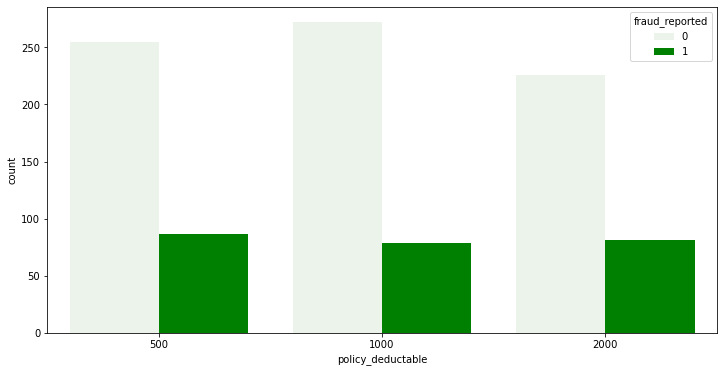

In [32]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'policy_deductable' , hue = 'fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

From above we can observe that policy_deductable with 500 has the highest fraud reports.

<AxesSubplot:xlabel='fraud_reported', ylabel='policy_annual_premium'>

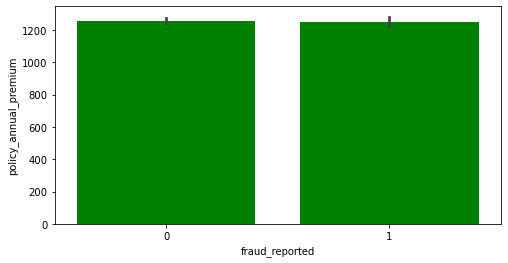

In [33]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'fraud_reported', y = 'policy_annual_premium' , data = df , dodge = True , color = 'Green' , saturation = 1)

From above we can observe that there is not much variations in this dataset.

In [34]:
df['umbrella_limit'].value_counts()

 0           798
 6000000      57
 5000000      46
 4000000      39
 7000000      29
 3000000      12
 8000000       8
 9000000       5
 2000000       3
 10000000      2
-1000000       1
Name: umbrella_limit, dtype: int64

In [35]:
df['umbrella_limit'].replace([6000000 ,  5000000 , 4000000 ,  7000000 , 
                              3000000 , 8000000 ,9000000 , 2000000 , 10000000 ,-1000000] , 1 , inplace = True )

In [36]:
df['umbrella_limit'].value_counts()

0    798
1    202
Name: umbrella_limit, dtype: int64

As we see in umbrella_limit columns 0 or other values are present so know we are taking others values as 1.

<AxesSubplot:xlabel='umbrella_limit', ylabel='count'>

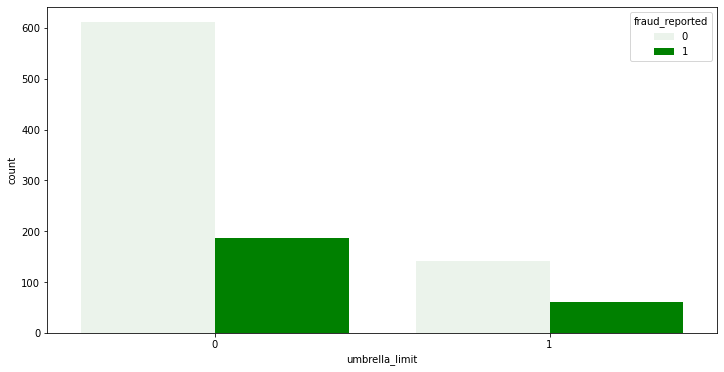

In [37]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'umbrella_limit' , hue = 'fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

From above we can observe that 0 has max fraud reported and 1 is is less case reported 

<AxesSubplot:xlabel='fraud_reported', ylabel='insured_zip'>

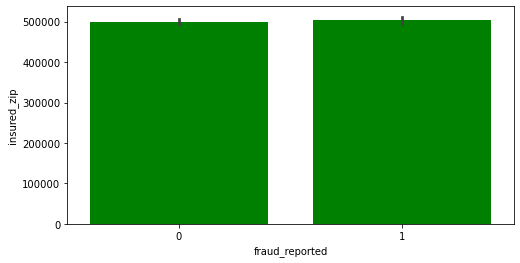

In [38]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'fraud_reported', y = 'insured_zip' , data = df , dodge = True , color = 'Green' , saturation = 1)

From above we can observe that there is not much variations in this feature.

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-gains'>

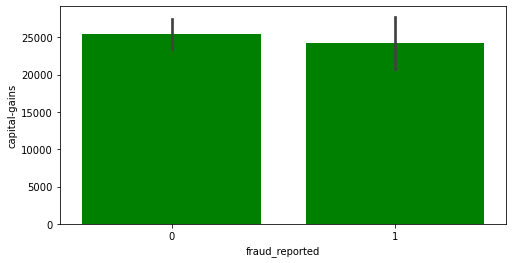

In [39]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'fraud_reported',y = 'capital-gains' , data = df , dodge = True , color = 'Green' , saturation = 1)

From above we can observe that 0 is minor highest then 1.

<AxesSubplot:xlabel='fraud_reported', ylabel='capital-loss'>

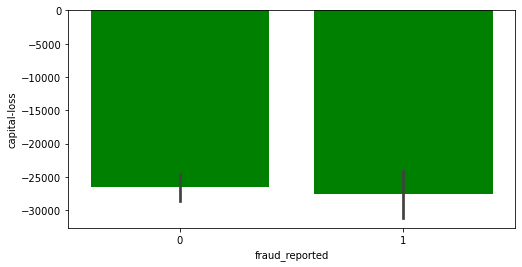

In [40]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'fraud_reported', y = 'capital-loss' , data = df , dodge = True , color = 'Green' , saturation = 1)

From above we can observe that 1 is minor highest then 0.

<AxesSubplot:xlabel='incident_hour_of_the_day', ylabel='count'>

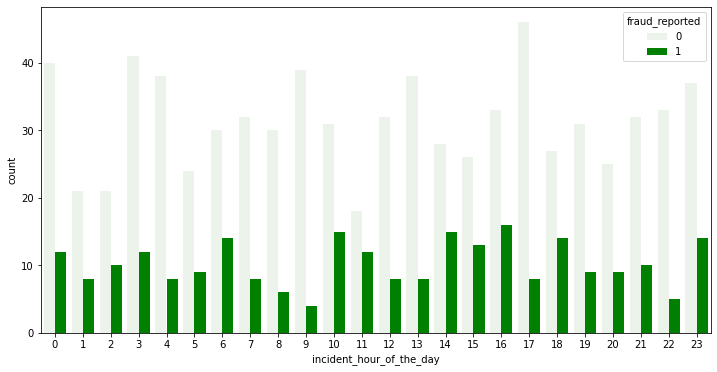

In [41]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'incident_hour_of_the_day' , hue = 'fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

According to the incident hour of the day maximum case between 10 to 18.

<AxesSubplot:xlabel='number_of_vehicles_involved', ylabel='count'>

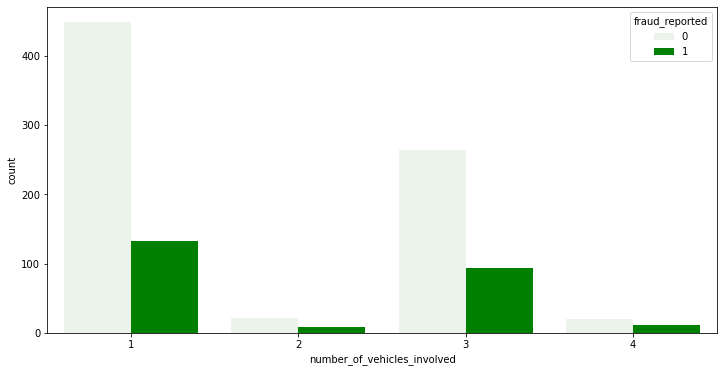

In [42]:
plt.figure(figsize = (12,6))
sns.countplot(x ='number_of_vehicles_involved' , hue = 'fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

From above we can observe that most number of vehicles involved are either 1 or 3.

<AxesSubplot:xlabel='property_damage', ylabel='count'>

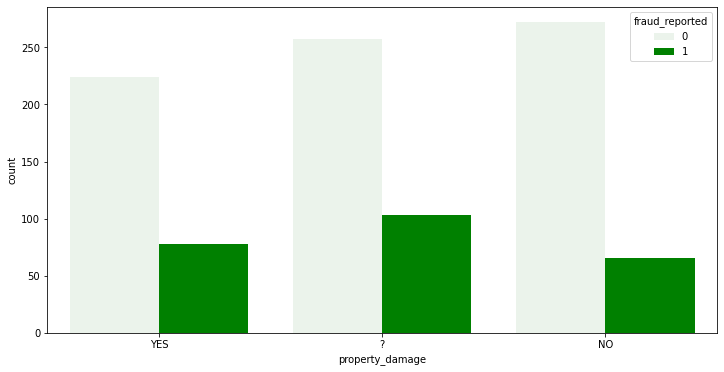

In [43]:
plt.figure(figsize = (12,6))
sns.countplot(x ='property_damage' , hue = 'fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)


From above we can observe that ther are values which are not known , so we will deal with them later on.

<AxesSubplot:xlabel='bodily_injuries', ylabel='count'>

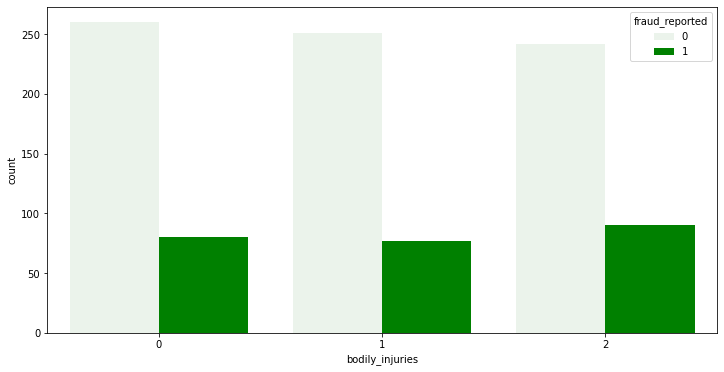

In [44]:
plt.figure(figsize = (12,6))
sns.countplot(x ='bodily_injuries' , hue = 'fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

From above we can observe that bodily reported as 2 has the highest fraud reports.

<AxesSubplot:xlabel='witnesses', ylabel='count'>

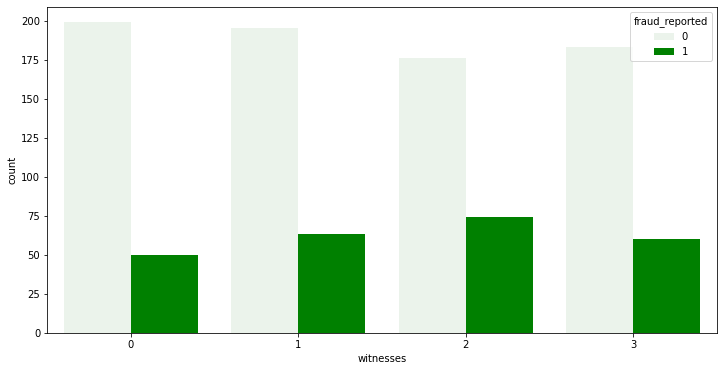

In [45]:
plt.figure(figsize = (12,6))
sns.countplot(x ='witnesses' , hue = 'fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

From above we can observe that the cases which has 2 witnessess has the highest fraud reported.

<AxesSubplot:xlabel='fraud_reported', ylabel='total_claim_amount'>

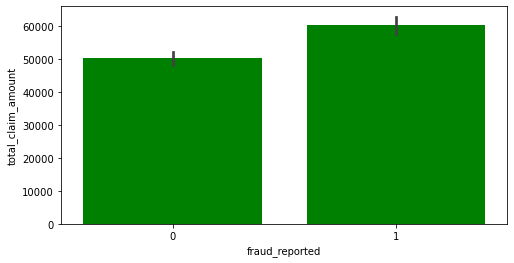

In [46]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'fraud_reported',y ='total_claim_amount' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='fraud_reported', ylabel='injury_claim'>

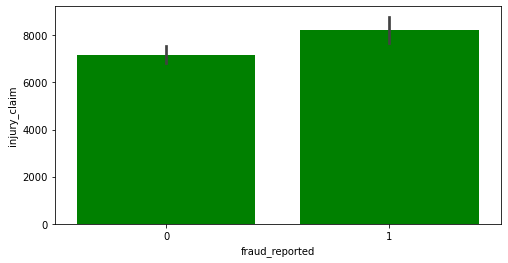

In [47]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'fraud_reported',y ='injury_claim' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='fraud_reported', ylabel='property_claim'>

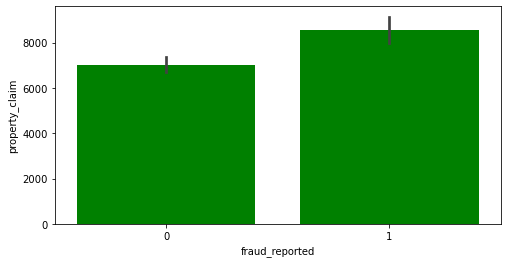

In [48]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'fraud_reported',y ='property_claim' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='fraud_reported', ylabel='vehicle_claim'>

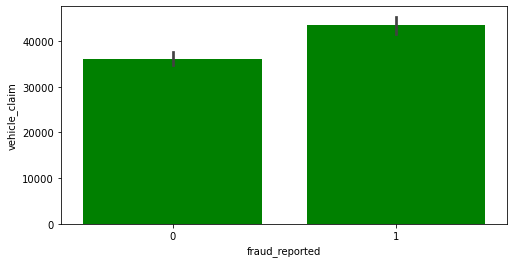

In [49]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'fraud_reported',y ='vehicle_claim' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='auto_year', ylabel='count'>

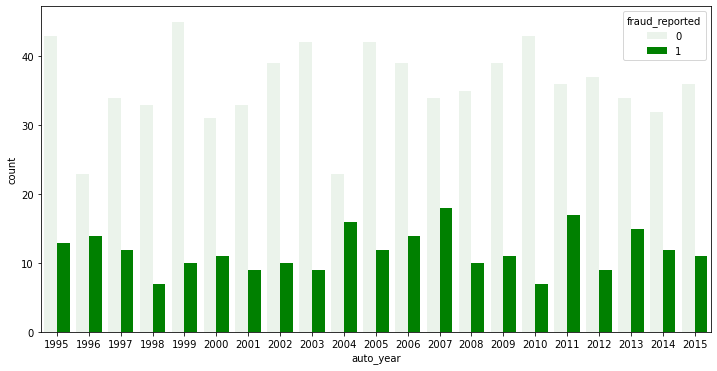

In [50]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'auto_year',hue ='fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='policy_state', ylabel='count'>

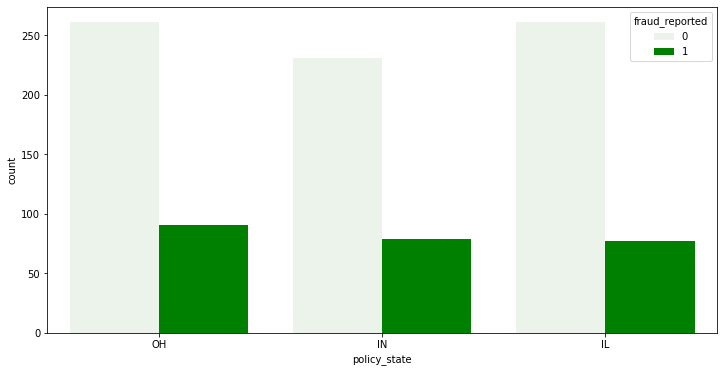

In [51]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'policy_state',hue ='fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

OH is highest fraud_reported then others.

<AxesSubplot:xlabel='insured_occupation', ylabel='count'>

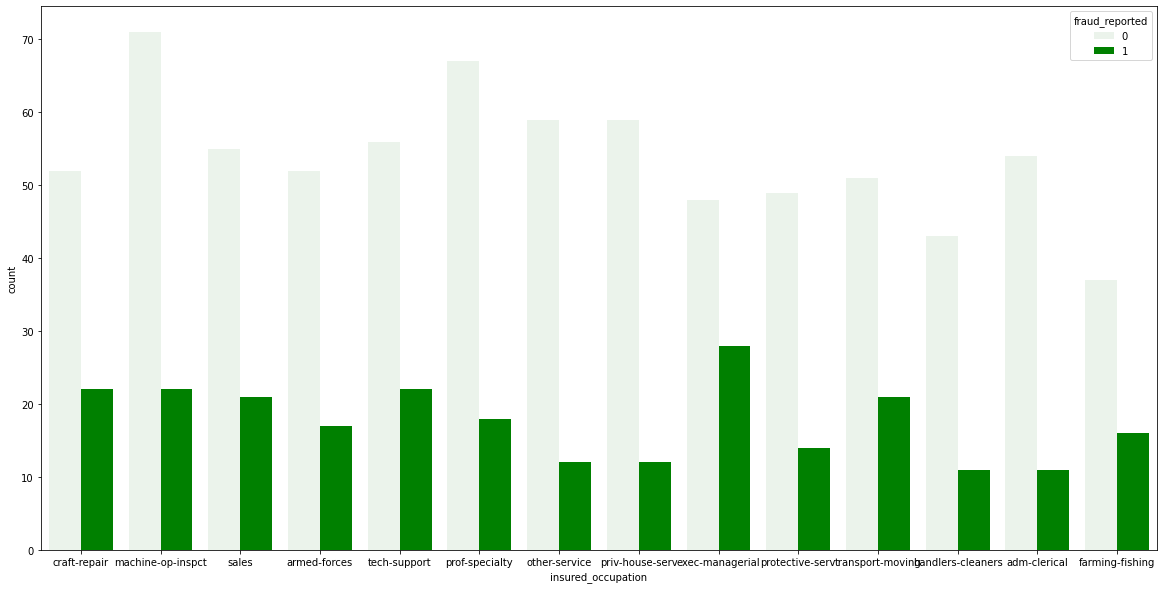

In [52]:
plt.figure(figsize = (20,10))
sns.countplot(x = 'insured_occupation',hue ='fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

From above we can observe that people who has an occupation of exec_managerial has the highest fraud_reported.

<AxesSubplot:xlabel='incident_type', ylabel='count'>

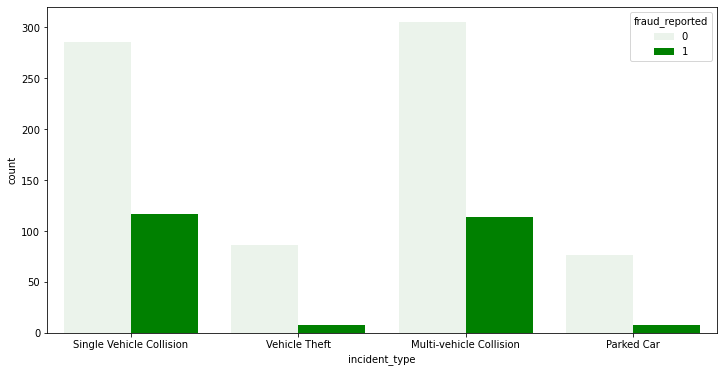

In [53]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'incident_type',hue ='fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='collision_type', ylabel='count'>

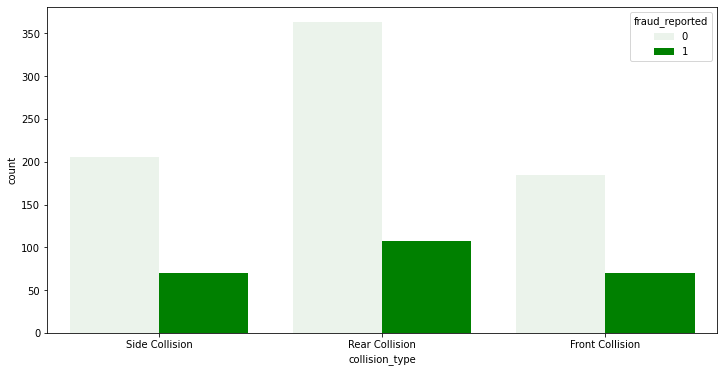

In [54]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'collision_type',hue ='fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='incident_severity', ylabel='count'>

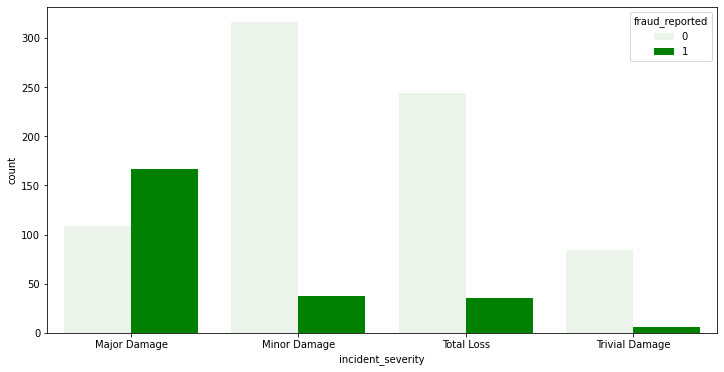

In [55]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'incident_severity',hue ='fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='authorities_contacted', ylabel='count'>

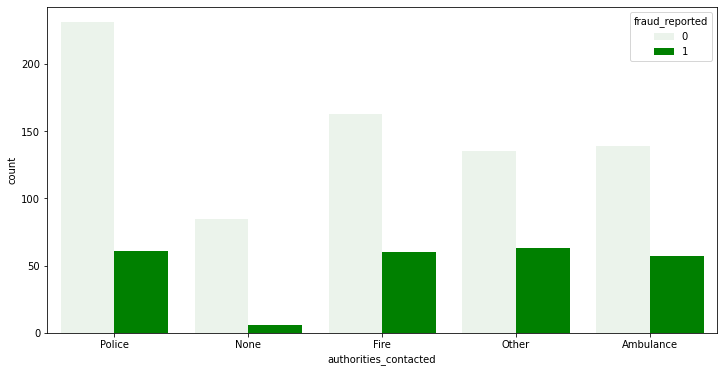

In [56]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'authorities_contacted',hue ='fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='incident_state', ylabel='count'>

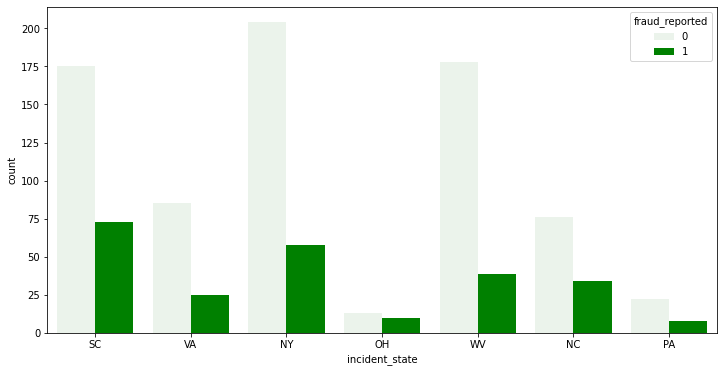

In [57]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'incident_state',hue ='fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='incident_city', ylabel='count'>

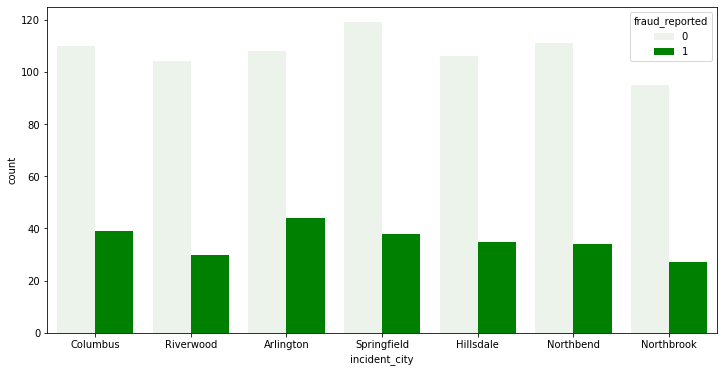

In [58]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'incident_city',hue ='fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='property_damage', ylabel='count'>

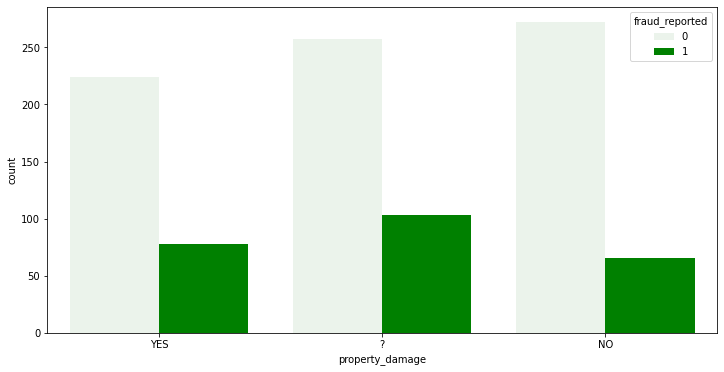

In [59]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'property_damage',hue ='fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='police_report_available', ylabel='count'>

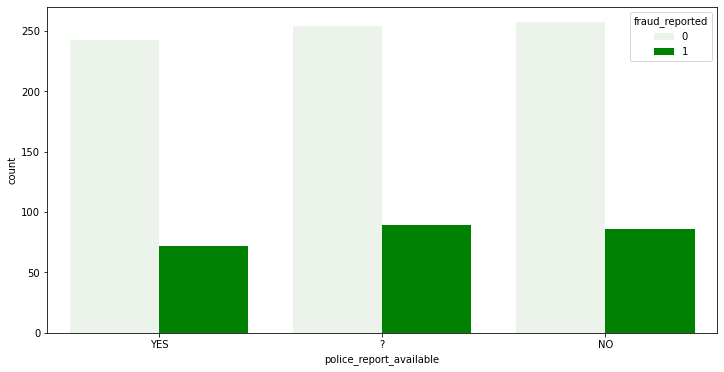

In [60]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'police_report_available',hue ='fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

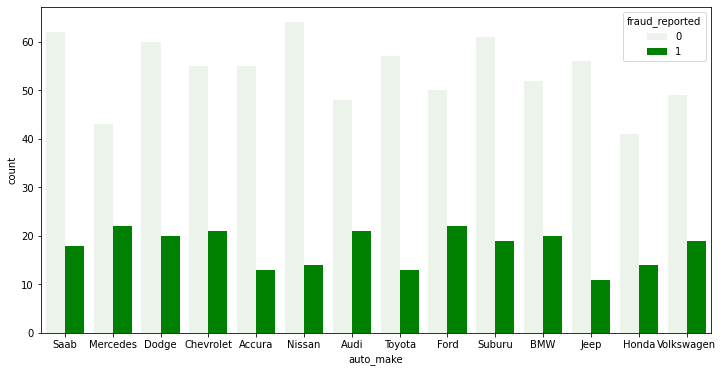

In [61]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'auto_make',hue ='fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

<AxesSubplot:xlabel='auto_model', ylabel='count'>

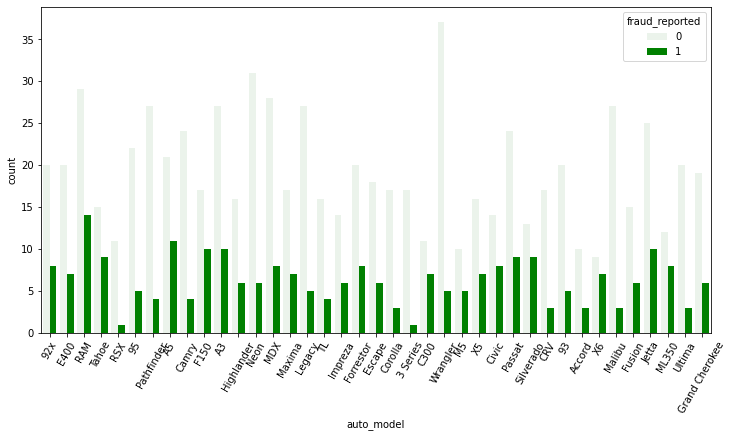

In [62]:
plt.figure(figsize = (12,6))
plt.xticks(rotation=60)
sns.countplot(x = 'auto_model',hue ='fraud_reported' , data = df , dodge = True , color = 'Green' , saturation = 1)

# Feature Engg.

In [63]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,1,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,1,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,1,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,1,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0


In [64]:
pd.concat({'unique values': df.apply(pd.unique), 'number of unique values': df.nunique()}, axis=1)

,unique values,number of unique values
months_as_customer,"[328, 228, 134, 256, 137, 165, 27, 212, 235, 4...",391
age,"[48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...",46
policy_number,"[521585, 342868, 687698, 227811, 367455, 10459...",1000
policy_bind_date,"[17-10-2014, 27-06-2006, 06-09-2000, 25-05-199...",951
policy_state,"[OH, IN, IL]",3
policy_csl,"[250/500, 100/300, 500/1000]",3
policy_deductable,"[1000, 2000, 500]",3
policy_annual_premium,"[1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...",991
umbrella_limit,"[0, 1]",2
insured_zip,"[466132, 468176, 430632, 608117, 610706, 47845...",995


In [65]:
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['Policy_Bind_Month'] = df['policy_bind_date'].dt.month
df['Policy_Bind_Day'] = df['policy_bind_date'].dt.day

In [66]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Bind_Month,Policy_Bind_Day
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,71610,6510,13020,52080,Saab,92x,2004,1,10,17
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,1,468176,...,5070,780,780,3510,Mercedes,E400,2007,1,6,27
2,134,29,687698,2000-06-09,OH,100/300,2000,1413.14,1,430632,...,34650,7700,3850,23100,Dodge,RAM,2007,0,6,9
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,1,608117,...,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1,5,25
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,1,610706,...,6500,1300,650,4550,Accura,RSX,2009,0,6,6


In [67]:
df['property_damage'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [68]:
df['property_damage'] = df['property_damage'].replace(['?'],np.nan)

In [69]:
df = df.fillna(df['property_damage'].value_counts().index[0])

In [70]:
df['police_report_available'].unique()

array(['YES', '?', 'NO'], dtype=object)

In [71]:
df['police_report_available'] = df['police_report_available'].replace(['?'],np.nan)

In [72]:
df = df.fillna(df['police_report_available'].value_counts().index[0])

In [73]:
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['incident_Month'] = df['incident_date'].dt.month
df['incident_Day'] = df['incident_date'].dt.day

# Data Encoding

In [74]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['policy_state'] = labelencoder.fit_transform(df['policy_state'])
df['policy_csl'] = labelencoder.fit_transform(df['policy_csl'])
df['policy_deductable'] = labelencoder.fit_transform(df['policy_deductable'])
df['insured_sex'] = labelencoder.fit_transform(df['insured_sex'])
df['insured_education_level'] = labelencoder.fit_transform(df['insured_education_level'])
df['insured_occupation'] = labelencoder.fit_transform(df['insured_occupation'])
df['insured_hobbies'] = labelencoder.fit_transform(df['insured_hobbies'])
df['insured_relationship'] = labelencoder.fit_transform(df['insured_relationship'])
df['incident_type'] = labelencoder.fit_transform(df['incident_type'])
df['collision_type'] = labelencoder.fit_transform(df['collision_type'])
df['incident_severity'] = labelencoder.fit_transform(df['incident_severity'])
df['authorities_contacted'] = labelencoder.fit_transform(df['authorities_contacted'])
df['incident_state'] = labelencoder.fit_transform(df['incident_city'])
df['incident_city'] = labelencoder.fit_transform(df['incident_city'])
df['incident_location'] = labelencoder.fit_transform(df['incident_location'])
df['incident_hour_of_the_day'] = labelencoder.fit_transform(df['incident_hour_of_the_day'])
df['number_of_vehicles_involved'] = labelencoder.fit_transform(df['number_of_vehicles_involved'])
df['property_damage'] = labelencoder.fit_transform(df['property_damage'])
df['police_report_available'] = labelencoder.fit_transform(df['police_report_available'])
df['auto_make'] = labelencoder.fit_transform(df['auto_make'])
df['auto_model'] = labelencoder.fit_transform(df['auto_model'])
df['auto_year'] = labelencoder.fit_transform(df['auto_year'])
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Bind_Month,Policy_Bind_Day,incident_Month,incident_Day
0,328,48,521585,2014-10-17,2,1,1,1406.91,0,466132,...,13020,52080,10,1,9,1,10,17,1,25
1,228,42,342868,2006-06-27,1,1,2,1197.22,1,468176,...,780,3510,8,12,12,1,6,27,1,21
2,134,29,687698,2000-06-09,2,0,2,1413.14,1,430632,...,3850,23100,4,30,12,0,6,9,2,22
3,256,41,227811,1990-05-25,0,1,2,1415.74,1,608117,...,6340,50720,3,34,19,1,5,25,10,1
4,228,44,367455,2014-06-06,0,2,1,1583.91,1,610706,...,650,4550,0,31,14,0,6,6,2,17


In [75]:
df.drop(['policy_bind_date','incident_date'],axis=1,inplace=True)

In [76]:
df.drop(['policy_number'],axis=1,inplace=True)

In [77]:
df.head()

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Bind_Month,Policy_Bind_Day,incident_Month,incident_Day
0,328,48,2,1,1,1406.91,0,466132,1,4,...,13020,52080,10,1,9,1,10,17,1,25
1,228,42,1,1,2,1197.22,1,468176,1,4,...,780,3510,8,12,12,1,6,27,1,21
2,134,29,2,0,2,1413.14,1,430632,0,6,...,3850,23100,4,30,12,0,6,9,2,22
3,256,41,0,1,2,1415.74,1,608117,0,6,...,6340,50720,3,34,19,1,5,25,10,1
4,228,44,0,2,1,1583.91,1,610706,1,0,...,650,4550,0,31,14,0,6,6,2,17


In [78]:
pd.concat({'unique values': df.apply(pd.unique), 'number of unique values': df.nunique()}, axis=1)

,unique values,number of unique values
months_as_customer,"[328, 228, 134, 256, 137, 165, 27, 212, 235, 4...",391
age,"[48, 42, 29, 41, 44, 39, 34, 37, 33, 61, 23, 3...",46
policy_state,"[2, 1, 0]",3
policy_csl,"[1, 0, 2]",3
policy_deductable,"[1, 2, 0]",3
policy_annual_premium,"[1406.91, 1197.22, 1413.14, 1415.74, 1583.91, ...",991
umbrella_limit,"[0, 1]",2
insured_zip,"[466132, 468176, 430632, 608117, 610706, 47845...",995
insured_sex,"[1, 0]",2
insured_education_level,"[4, 6, 0, 5, 2, 1, 3]",7


# Removing Outliers with Zscore

In [79]:
from scipy.stats import zscore

In [80]:
z=np.abs(zscore(df))
z

array([[1.07813958, 0.99083647, 1.18717314, ..., 0.17545148, 0.73503976,
        1.14160272],
       [0.2089946 , 0.33407345, 0.01685641, ..., 1.30593786, 0.73503976,
        0.75838596],
       [0.60800168, 1.08891308, 1.18717314, ..., 0.72893761, 0.42966387,
        0.85419015],
       ...,
       [0.64276748, 0.54161057, 1.18717314, ..., 0.17545148, 0.73503976,
        0.94999434],
       [2.20802805, 2.52328351, 1.22088596, ..., 0.28850012, 0.42966387,
        1.23740691],
       [2.19064515, 2.3043625 , 1.18717314, ..., 0.50284034, 0.42966387,
        1.23740691]])

In [81]:
threshold=3
print(np.where(z>3))

(array([229, 248, 500, 763, 807], dtype=int64), array([ 5,  5, 30,  5, 14], dtype=int64))


In [82]:
xd=df[(z<3).all(axis=1)]
xd

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,Policy_Bind_Month,Policy_Bind_Day,incident_Month,incident_Day
0,328,48,2,1,1,1406.91,0,466132,1,4,...,13020,52080,10,1,9,1,10,17,1,25
1,228,42,1,1,2,1197.22,1,468176,1,4,...,780,3510,8,12,12,1,6,27,1,21
2,134,29,2,0,2,1413.14,1,430632,0,6,...,3850,23100,4,30,12,0,6,9,2,22
3,256,41,0,1,2,1415.74,1,608117,0,6,...,6340,50720,3,34,19,1,5,25,10,1
4,228,44,0,2,1,1583.91,1,610706,1,0,...,650,4550,0,31,14,0,6,6,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,2,1,1310.80,0,431289,0,5,...,8720,61040,6,6,11,0,7,16,2,22
996,285,41,0,0,1,1436.79,0,608177,0,6,...,18080,72320,13,28,20,0,5,1,1,24
997,130,34,2,1,0,1383.49,1,442797,0,5,...,7500,52500,11,19,1,0,2,17,1,23
998,458,62,0,2,2,1356.92,1,441714,1,0,...,5220,36540,1,5,3,0,11,18,2,26


# Spliting the Independent and Target Variables.

In [83]:
x=xd.drop('fraud_reported',axis=1)
y=xd['fraud_reported']

# Data Scaling

In [84]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
dx=sc.fit_transform(x)
dx=pd.DataFrame(dx,columns=x.columns)
dx

,months_as_customer,age,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,...,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,Policy_Bind_Month,Policy_Bind_Day,incident_Month,incident_Day
0,0.684760,0.644444,1.0,0.5,0.5,0.606891,0.0,0.188769,1.0,0.666667,...,0.303497,0.596974,0.654296,0.769231,0.026316,0.45,0.818182,0.533333,0.000000,0.800000
1,0.475992,0.511111,0.5,0.5,1.0,0.460404,1.0,0.199478,1.0,0.666667,...,0.036364,0.035763,0.043276,0.615385,0.315789,0.60,0.454545,0.866667,0.000000,0.666667
2,0.279749,0.222222,1.0,0.0,1.0,0.611243,1.0,0.002766,0.0,1.000000,...,0.358974,0.176525,0.289722,0.307692,0.789474,0.60,0.454545,0.266667,0.090909,0.700000
3,0.534447,0.488889,0.0,0.5,1.0,0.613059,1.0,0.932699,0.0,1.000000,...,0.295571,0.290692,0.637187,0.230769,0.894737,0.95,0.363636,0.800000,0.818182,0.000000
4,0.475992,0.555556,0.0,1.0,0.5,0.730541,1.0,0.946264,1.0,0.000000,...,0.060606,0.029803,0.056359,0.000000,0.815789,0.70,0.454545,0.166667,0.090909,0.533333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,0.006263,0.422222,1.0,1.0,0.5,0.539750,0.0,0.006209,0.0,0.833333,...,0.813054,0.399817,0.767015,0.461538,0.157895,0.55,0.545455,0.500000,0.090909,0.700000
991,0.594990,0.488889,0.0,0.0,0.5,0.627765,0.0,0.933013,0.0,1.000000,...,0.842890,0.828978,0.908919,1.000000,0.736842,1.00,0.363636,0.000000,0.000000,0.766667
992,0.271399,0.333333,1.0,0.5,0.0,0.590530,1.0,0.066505,0.0,0.833333,...,0.349650,0.343879,0.659580,0.846154,0.500000,0.05,0.090909,0.533333,0.000000,0.733333
993,0.956159,0.955556,0.0,1.0,1.0,0.571968,1.0,0.060831,1.0,0.000000,...,0.243357,0.239340,0.458800,0.076923,0.131579,0.15,0.909091,0.566667,0.090909,0.833333


# PCA

In [85]:
from sklearn.decomposition import PCA
testpca=PCA()
Y=testpca.fit(dx)

In [86]:
Y.explained_variance_ratio_

array([6.83626957e-02, 5.80745100e-02, 5.45481150e-02, 5.22112875e-02,
       5.04696808e-02, 4.26962723e-02, 4.07244960e-02, 3.97150487e-02,
       3.92898695e-02, 3.75717741e-02, 3.58189369e-02, 3.57294452e-02,
       3.31108493e-02, 3.05181755e-02, 2.98331220e-02, 2.75477226e-02,
       2.66282674e-02, 2.44657372e-02, 2.41927717e-02, 2.21246597e-02,
       2.18308512e-02, 2.09895358e-02, 2.04612607e-02, 1.95421593e-02,
       1.90474490e-02, 1.82889032e-02, 1.78354834e-02, 1.74196554e-02,
       1.62316740e-02, 1.51752680e-02, 1.45572445e-02, 7.57350875e-03,
       6.18108900e-03, 4.78129286e-03, 2.88686125e-03, 2.73302744e-03,
       8.31298903e-04, 1.34821645e-32, 4.14450131e-34])

In [87]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([  6.83626957,  12.64372058,  18.09853208,  23.31966083,
        28.36662891,  32.63625613,  36.70870573,  40.6802106 ,
        44.60919755,  48.36637496,  51.94826866,  55.52121318,
        58.83229811,  61.88411566,  64.86742786,  67.62220012,
        70.28502686,  72.73160058,  75.15087775,  77.36334372,
        79.54642885,  81.64538242,  83.6915085 ,  85.64572443,
        87.55046933,  89.37935965,  91.16290799,  92.90487353,
        94.52804093,  96.04556773,  97.50129218,  98.25864305,
        98.87675195,  99.35488124,  99.64356737,  99.91687011,
       100.        , 100.        , 100.        ])

In [88]:
FinalPCA=PCA(n_components=30)
FinalData=FinalPCA.fit_transform(x)

In [89]:
FinalData2=pd.DataFrame(FinalData)
FinalData2

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,-34725.802736,21941.113423,-2550.048459,40003.580837,1059.368194,-4632.929315,517.874212,118.525648,125.253619,20.716731,...,-0.024747,-0.842823,-1.689447,-2.296621,-0.731171,0.575145,-1.341077,-0.510917,-0.236879,-0.220277
1,-31142.263136,-63788.698478,-30341.361244,-664.437259,-786.967445,84.037597,147.177541,-64.046200,37.734487,8.150669,...,-0.410095,-1.368088,0.149471,-1.347812,-0.566883,-1.351302,-0.841961,0.190495,-1.292351,0.780384
2,-69304.498788,-26740.187671,-10388.522103,26188.603418,-2672.802508,2514.089510,181.964544,165.918608,-67.111292,-8.559378,...,1.322891,-2.827834,0.412406,-0.813468,2.552397,1.637468,-0.913580,-0.773454,0.776430,1.604302
3,106044.321367,22637.427185,41467.143505,-8798.487458,6225.122479,286.018728,167.274544,122.906585,49.193418,-18.248645,...,3.853103,-2.015780,1.427480,-1.828857,-0.847508,0.576918,-0.630250,1.681710,-0.461362,0.977802
4,110503.064219,-50824.359577,49503.002540,12879.234646,-415.728349,245.019850,-278.926597,334.826676,31.660771,-9.565821,...,-0.968850,2.116973,1.112026,0.187894,-1.465716,-0.598172,-0.376263,1.427710,-0.947561,-0.825968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
990,-70057.215852,36530.891164,-41689.403666,2624.900718,-2184.036400,6110.795646,47.227003,64.239794,-215.717234,15.428249,...,0.733828,-1.791954,2.153541,0.499402,-1.725770,0.060596,-0.166389,-0.920220,-0.823632,-0.609625
991,106449.602484,68898.869437,6536.945557,51601.171341,-5728.205697,-591.475372,-283.201735,186.353379,54.187674,-1.411124,...,-0.232275,-2.214492,3.572658,-0.060680,-2.028617,1.083411,-0.124897,1.110905,0.810803,0.443384
992,-58033.544857,16849.325305,-14975.846300,27168.051932,4459.242115,305.556502,260.079735,102.415489,-76.564118,3.419846,...,-0.215321,-1.522677,-0.272433,-1.650520,1.943194,1.643470,-0.604039,-1.029697,1.198560,-0.632995
993,-58676.916952,-11109.535194,-36413.604168,1183.213326,2887.603356,332.848542,92.879936,86.508065,258.078572,16.004049,...,1.213403,2.691413,2.016515,-0.607349,-0.122191,-0.142848,-0.909986,1.412094,-1.325605,0.070526


# Data Imbalance

Text(0.5, 1.0, 'fraud_reported')

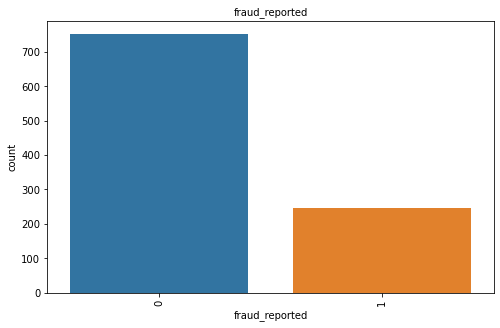

In [90]:
fig_size = (8,5)
fig, ax = plt.subplots(figsize = fig_size)
sns.countplot(data=df, x="fraud_reported")
plt.xticks(rotation=90)
plt.title("fraud_reported", fontsize = 10)

In [91]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over, y_over=SM.fit_resample(FinalData2,y)

In [92]:
#Converting target variable into DataFrame
y_over=pd.DataFrame(y_over)

In [93]:
X=x_over
y=y_over

# Finding best Random State for train test split.

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

max_accuracy = 0
best_rs = 0
for i in range(1, 1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    lg = LogisticRegression()
    lg.fit(X_train, y_train)
    pred = lg.predict(X_test)
    acc = accuracy_score(y_test, pred)
    if acc > max_accuracy:
        max_accuracy = acc
        best_rs = i
print(f"Best Random State is {best_rs}, {max_accuracy*100}")

Best Random State is 521, 65.33333333333333


In [95]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.30,random_state=634)

# Importing Algorithms

In [96]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# LogisticRegression

In [97]:
lg = LogisticRegression()
lg.fit(X_train, y_train)
pred_lg = lg.predict(X_test)
print(accuracy_score(y_test,pred_lg))
print(confusion_matrix(y_test,pred_lg))
print(classification_report(y_test,pred_lg))

0.6288888888888889
[[107 103]
 [ 64 176]]
              precision    recall  f1-score   support

           0       0.63      0.51      0.56       210
           1       0.63      0.73      0.68       240

    accuracy                           0.63       450
   macro avg       0.63      0.62      0.62       450
weighted avg       0.63      0.63      0.62       450



# RandomForestClassifier

In [98]:
rf=RandomForestClassifier(n_estimators=100,random_state=49)
rf.fit(X_train,y_train)
predrf=rf.predict(X_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8822222222222222
[[195  15]
 [ 38 202]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       210
           1       0.93      0.84      0.88       240

    accuracy                           0.88       450
   macro avg       0.88      0.89      0.88       450
weighted avg       0.89      0.88      0.88       450



# DecisionTreeClassifier

In [99]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=None)
dtc.fit(X_train,y_train)
preddtc=dtc.predict(X_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.74
[[145  65]
 [ 52 188]]
              precision    recall  f1-score   support

           0       0.74      0.69      0.71       210
           1       0.74      0.78      0.76       240

    accuracy                           0.74       450
   macro avg       0.74      0.74      0.74       450
weighted avg       0.74      0.74      0.74       450



# AdaBoostClassifier

In [100]:
ad=AdaBoostClassifier()
ad.fit(X_train,y_train) 
predad=ad.predict(X_test)
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.7533333333333333
[[156  54]
 [ 57 183]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       210
           1       0.77      0.76      0.77       240

    accuracy                           0.75       450
   macro avg       0.75      0.75      0.75       450
weighted avg       0.75      0.75      0.75       450



# KNeighborsClassifier

In [101]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
predknn=knn.predict(X_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.6911111111111111
[[118  92]
 [ 47 193]]
              precision    recall  f1-score   support

           0       0.72      0.56      0.63       210
           1       0.68      0.80      0.74       240

    accuracy                           0.69       450
   macro avg       0.70      0.68      0.68       450
weighted avg       0.69      0.69      0.69       450



# Support Vector Classifer

In [102]:
svc=SVC()
svc.fit(X_train,y_train) 
pred_svc=svc.predict(X_test)
print(accuracy_score(y_test,pred_svc))
print(confusion_matrix(y_test,pred_svc))
print(classification_report(y_test,pred_svc))

0.6333333333333333
[[106 104]
 [ 61 179]]
              precision    recall  f1-score   support

           0       0.63      0.50      0.56       210
           1       0.63      0.75      0.68       240

    accuracy                           0.63       450
   macro avg       0.63      0.63      0.62       450
weighted avg       0.63      0.63      0.63       450



# Cross Validation

As we know the Random Forest Classifier is given hight score but we are Cross validating the models to see thre are underfitting or overfitting present or not.

In [103]:
from sklearn.model_selection import cross_val_score

lg_scores = cross_val_score(lg, X, y, cv = 5)
print(lg_scores)
print(f"Mean of accuracy scores is for Logistic Regression is {lg_scores.mean()*100}\n")

rf_scores = cross_val_score(rf, X, y, cv = 5)
print(rf_scores)
print(f"Mean of accuracy scores is for Random Forest Classifier is {rf_scores.mean()*100}\n")

dtc_scores = cross_val_score(dtc, X, y, cv = 5)
print(dtc_scores)
print(f"Mean of accuracy scores is for Decision Tree Classifier is {dtc_scores.mean()*100}\n")

ad_scores = cross_val_score(ad, X, y, cv = 5)
print(ad_scores)
print(f"Mean of accuracy scores is for ADA Boost Classifier is {ad_scores.mean()*100}\n")

knn_scores = cross_val_score(knn, X, y, cv = 5)
print(knn_scores)
print(f"Mean of accuracy scores is for KNN Classifier is {knn_scores.mean()*100}\n")

svc_scores = cross_val_score(svc, X, y, cv = 5)
print(svc_scores)
print(f"Mean of accuracy scores is for SVC Classifier is {svc_scores.mean()*100}\n")

[0.62333333 0.57333333 0.56333333 0.63879599 0.61538462]
Mean of accuracy scores is for Logistic Regression is 60.28361204013378

[0.80333333 0.86666667 0.89333333 0.89632107 0.9264214 ]
Mean of accuracy scores is for Random Forest Classifier is 87.72151616499443

[0.71333333 0.71       0.86       0.79598662 0.76588629]
Mean of accuracy scores is for Decision Tree Classifier is 76.90412486064659

[0.61       0.70333333 0.82       0.7993311  0.81605351]
Mean of accuracy scores is for ADA Boost Classifier is 74.97435897435898

[0.65333333 0.65333333 0.7        0.69899666 0.71237458]
Mean of accuracy scores is for KNN Classifier is 68.36075808249721

[0.61       0.61333333 0.56666667 0.65886288 0.60869565]
Mean of accuracy scores is for SVC Classifier is 61.151170568561874



# Hyper parameter tuning

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
rf = RandomForestClassifier()
grid_parameters = dict()
grid_parameters['criterion'] = ['gini', 'entropy']
grid_parameters['n_estimators'] = [1, 2, 4, 8, 10, 16, 32, 64, 100, 200]
grid_parameters['min_samples_split'] = [1,2,5,8,10,15,20,25,50,55,60,80,100]
grid_sr = GridSearchCV(estimator=rf,param_grid=grid_parameters,scoring='accuracy', cv=5)
grid_sr.fit(X_train, y_train)
best_parameters=grid_sr.best_params_
best_result=grid_sr.best_score_
best_model = grid_sr.best_estimator_
print(best_parameters)
print(best_result)
print(best_model)

{'criterion': 'entropy', 'min_samples_split': 10, 'n_estimators': 100}
0.8454180906812485
RandomForestClassifier(criterion='entropy', min_samples_split=10)


In [106]:
RF = RandomForestClassifier(criterion = 'gini', min_samples_split = 2, n_estimators = 100)
RF.fit(X_train, y_train)
print(RF.score(X_train, y_train))
pred_rf = RF.predict(X_test)

1.0


# Model Evaluation

# Metrics

In [107]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [108]:
#Import ROC_AUC_SCORE.
from sklearn.metrics import roc_auc_score

In [109]:
y_pred_prob=RF.predict_proba(X_test)[:,1]
y_pred_prob

array([0.28, 0.45, 0.3 , 0.69, 0.94, 0.49, 0.96, 0.89, 0.36, 0.54, 0.49,
       0.83, 0.56, 0.86, 0.26, 0.82, 0.67, 0.36, 0.46, 0.85, 0.17, 0.88,
       0.41, 0.28, 0.11, 0.25, 0.63, 0.95, 0.91, 0.79, 0.35, 0.34, 0.64,
       0.58, 0.88, 0.61, 0.88, 0.41, 0.34, 0.9 , 0.19, 0.35, 0.65, 0.3 ,
       0.67, 0.23, 0.21, 0.29, 0.82, 0.27, 0.89, 0.48, 0.16, 0.72, 0.33,
       0.84, 0.97, 0.37, 0.2 , 0.23, 0.3 , 0.65, 0.79, 0.42, 0.31, 0.82,
       0.97, 0.64, 0.83, 0.19, 0.25, 0.38, 0.3 , 0.48, 0.16, 0.21, 0.83,
       0.89, 0.81, 0.21, 0.29, 0.33, 0.86, 0.71, 0.72, 0.18, 0.21, 0.78,
       0.28, 0.2 , 0.86, 0.11, 0.82, 0.38, 0.69, 0.29, 0.71, 0.13, 0.18,
       0.9 , 0.82, 0.54, 0.69, 0.44, 0.5 , 0.74, 0.17, 0.28, 0.75, 0.15,
       0.77, 0.66, 0.16, 0.86, 0.57, 0.3 , 0.42, 0.17, 0.47, 0.35, 0.23,
       0.86, 0.73, 0.23, 0.94, 0.28, 0.37, 0.43, 0.29, 0.83, 0.21, 0.67,
       0.72, 0.53, 0.81, 0.74, 0.82, 0.89, 0.77, 0.16, 0.23, 0.83, 0.41,
       0.81, 0.86, 0.84, 0.29, 0.29, 0.29, 0.86, 0.

In [110]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [111]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.0047619 , 0.0047619 ,
       0.0047619 , 0.00952381, 0.00952381, 0.01428571, 0.01428571,
       0.01428571, 0.01428571, 0.01428571, 0.02380952, 0.02857143,
       0.03333333, 0.03333333, 0.03809524, 0.03809524, 0.04285714,
       0.04285714, 0.04285714, 0.04285714, 0.05238095, 0.05238095,
       0.05714286, 0.06666667, 0.07619048, 0.07619048, 0.08095238,
       0.08571429, 0.1       , 0.10952381, 0.12857143, 0.14285714,
       0.15238095, 0.15714286, 0.17142857, 0.18571429, 0.21428571,
       0.23809524, 0.27619048, 0.2952381 , 0.32380952, 0.34285714,
       0.36666667, 0.38571429, 0.41904762, 0.44285714, 0.49047619,
       0.53333333, 0.59047619, 0.6       , 0.63809524, 0.66666667,
       0.71428571, 0.73809524, 0.78095238, 0.81904762, 0.85714

In [112]:
tpr

array([0.        , 0.00833333, 0.025     , 0.03333333, 0.0375    ,
       0.05416667, 0.07916667, 0.1       , 0.11666667, 0.175     ,
       0.1875    , 0.23333333, 0.25      , 0.27916667, 0.325     ,
       0.3625    , 0.39583333, 0.41666667, 0.44583333, 0.46666667,
       0.49166667, 0.5       , 0.51666667, 0.53333333, 0.55      ,
       0.5625    , 0.5875    , 0.59166667, 0.60416667, 0.60833333,
       0.62916667, 0.64166667, 0.65      , 0.6625    , 0.675     ,
       0.6875    , 0.70416667, 0.725     , 0.75833333, 0.7625    ,
       0.775     , 0.79166667, 0.81666667, 0.82916667, 0.84166667,
       0.84583333, 0.86666667, 0.875     , 0.88333333, 0.8875    ,
       0.89583333, 0.90416667, 0.90833333, 0.91666667, 0.92083333,
       0.9375    , 0.9375    , 0.94583333, 0.94583333, 0.94583333,
       0.94583333, 0.95416667, 0.95416667, 0.95833333, 0.96666667,
       0.975     , 0.975     , 0.98333333, 0.9875    , 0.99166667,
       0.99166667, 0.99583333, 0.99583333, 1.        , 1.     

In [113]:
thresholds

array([1.98, 0.98, 0.97, 0.96, 0.95, 0.94, 0.92, 0.91, 0.9 , 0.88, 0.87,
       0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79, 0.78, 0.77, 0.76,
       0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68, 0.67, 0.66, 0.65,
       0.64, 0.63, 0.62, 0.6 , 0.59, 0.57, 0.56, 0.55, 0.54, 0.53, 0.52,
       0.51, 0.5 , 0.49, 0.48, 0.47, 0.46, 0.45, 0.44, 0.43, 0.42, 0.41,
       0.4 , 0.38, 0.37, 0.36, 0.35, 0.34, 0.33, 0.32, 0.31, 0.3 , 0.29,
       0.27, 0.26, 0.25, 0.24, 0.23, 0.22, 0.21, 0.2 , 0.18, 0.17, 0.16,
       0.15, 0.14, 0.13, 0.11, 0.07])

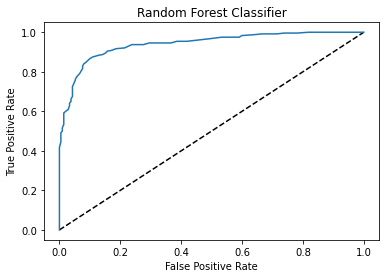

In [114]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Random Forest Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

In [115]:
auc_score=roc_auc_score(y_test,RF.predict(X_test))
print(auc_score)

0.8803571428571428


In [116]:
from sklearn import metrics

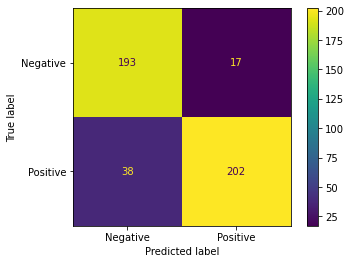

In [117]:
metrics.plot_confusion_matrix(RF, X_test, y_test, display_labels=['Negative', 'Positive'])

# Saving Model

In [118]:
import joblib
joblib.dump(RF,'Insurance claim Fraud Detection.obj')

['Insurance claim Fraud Detection.obj']